# Table of Content #

- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Downloading Data](#Downloading-Data)
- [Data Cleaning](#Data-Cleaning)
- [Outliers](#Outliers)


    

## Importing Necessary Libraries ##

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Setting display options
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

## Downloading Data ##

In [2]:
#Downloading information on flights for Q4 2018 from a cvs file
delays_Q4 = pd.read_csv('~/ga/projects/capstone_data/data/delaysQ4_2018.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (49,77,78,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data Cleaning ##

In [3]:
#Data size
delays_Q4.shape

(1796121, 111)

In [4]:
#Data columns
delays_Q4.columns

Index(['Unnamed: 0', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER',
       ...
       'DIV4_TAIL_NUM', 'DIV5_AIRPORT', 'DIV5_AIRPORT_ID',
       'DIV5_AIRPORT_SEQ_ID', 'DIV5_WHEELS_ON', 'DIV5_TOTAL_GTIME',
       'DIV5_LONGEST_GTIME', 'DIV5_WHEELS_OFF', 'DIV5_TAIL_NUM',
       'Unnamed: 109'],
      dtype='object', length=111)

In [5]:
#Transforming columns to lowercase
delays_Q4.columns = [column.lower() for column in delays_Q4.columns]

In [6]:
#Checking the columns
delays_Q4.columns

Index(['unnamed: 0', 'year', 'quarter', 'month', 'day_of_month', 'day_of_week',
       'fl_date', 'op_unique_carrier', 'op_carrier_airline_id', 'op_carrier',
       ...
       'div4_tail_num', 'div5_airport', 'div5_airport_id',
       'div5_airport_seq_id', 'div5_wheels_on', 'div5_total_gtime',
       'div5_longest_gtime', 'div5_wheels_off', 'div5_tail_num',
       'unnamed: 109'],
      dtype='object', length=111)

In [7]:
#Dropping technical columns
delays_Q4.drop(columns = ['unnamed: 0', 'year', 'quarter'], axis = 1, inplace=True)

In [8]:
#Checking the columns OP_UNIQUE_CARRIER and OP_CARRIER for being identical 
delays_Q4['op_unique_carrier'].value_counts() - delays_Q4['op_carrier'].value_counts() #Identical!

WN    0
DL    0
AA    0
OO    0
UA    0
YX    0
MQ    0
B6    0
OH    0
AS    0
9E    0
YV    0
EV    0
NK    0
F9    0
G4    0
HA    0
dtype: int64

In [9]:
#Dropping the column OP_UNIQUE_CARRIER as its content is present entirely in OP_CARRIER
delays_Q4.drop(columns = ['op_unique_carrier', 'op_carrier_airline_id'], axis = 1, inplace=True)

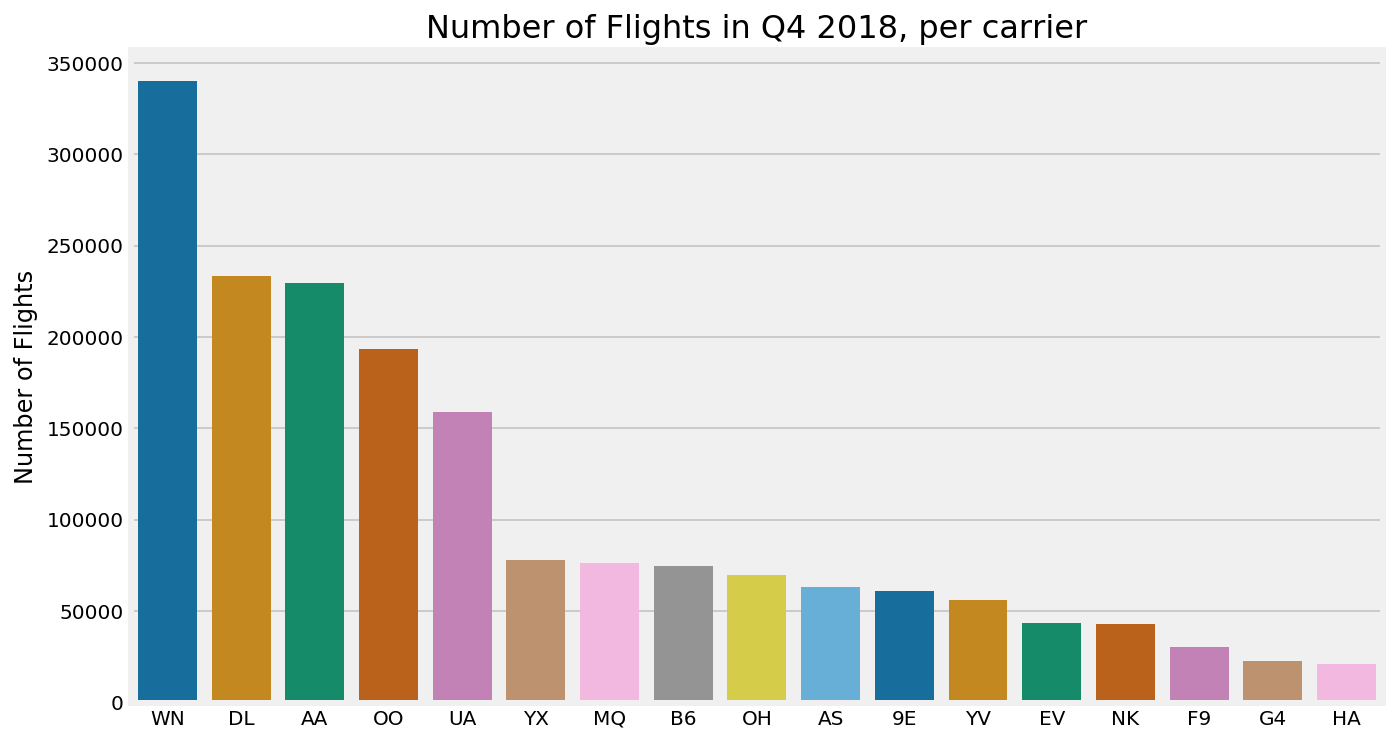

In [10]:
# Plotting the distribution of flights per carrier for Q4 2018
plt.figure(figsize=(10,6))
sns.barplot(x=delays_Q4['op_carrier'].value_counts().index,
            y=delays_Q4['op_carrier'].value_counts(), 
            palette='colorblind')
plt.title("Number of Flights in Q4 2018, per carrier", fontsize=16)
plt.ylabel("Number of Flights", fontsize=12);

In [11]:
#Dropping columns with the information of no particular interest for this research
delays_Q4.drop(columns = ['tail_num', 
                          'origin_airport_id', 
                          'origin_airport_seq_id',
                          'origin_city_market_id',
                        'origin_state_fips', 
                          'origin_wac',
                          'dest_airport_id',
                          'dest_airport_seq_id',
                         'dest_city_market_id',
                         'dest_state_fips',
                         'dest_wac',
                         'crs_dep_time', 
                          'dep_time',
                          'dep_delay_new',
                          'dep_time_blk',
                         'taxi_out',
                         'wheels_off',
                         'wheels_on',
                         'taxi_in',
                         'crs_arr_time',
                         'arr_time',
                         'arr_delay_new',
                         'arr_time_blk'], axis = 1, inplace=True)

In [12]:
#Checking FLIGHTS columns for valuable information content
delays_Q4['flights'].value_counts() #No valuable information

1.0    1796121
Name: flights, dtype: int64

In [13]:
#Dropping FLIGHTS and DISTANCE_GROUP columns as containing no valuable information 
delays_Q4.drop(columns = ['flights', 
                          'distance_group',], axis = 1, inplace=True)

In [14]:
#Getting information on DIVERTED columns
delays_Q4['diverted'].value_counts()

0.0    1792309
1.0       3812
Name: diverted, dtype: int64

In [15]:
delays_Q4['diverted'].value_counts(normalize=True)[1]

0.002122351445142059

In [16]:
print (f" Just {round(delays_Q4['diverted'].value_counts(normalize=True)[1]*100,2)}% of flights were diverted in Q4 2018")

 Just 0.21% of flights were diverted in Q4 2018


In [17]:
#Getting a more detailed insight onto quantitative characteristics of diverted flights
diverted = delays_Q4[delays_Q4['diverted'] == 1]
diverted.describe()

,month,day_of_month,day_of_week,op_carrier_fl_num,dep_delay,dep_del15,dep_delay_group,arr_delay,arr_del15,arr_delay_group,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,div_airport_landings,div_reached_dest,div_actual_elapsed_time,div_arr_delay,div_distance,div1_airport_id,div1_airport_seq_id,div1_wheels_on,div1_total_gtime,div1_longest_gtime,div1_wheels_off,div2_airport_id,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div3_airport,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime,div3_wheels_off,div3_tail_num,div4_airport,div4_airport_id,div4_airport_seq_id,div4_wheels_on,div4_total_gtime,div4_longest_gtime,div4_wheels_off,div4_tail_num,div5_airport,div5_airport_id,div5_airport_seq_id,div5_wheels_on,div5_total_gtime,div5_longest_gtime,div5_wheels_off,div5_tail_num,unnamed: 109
count,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,0.0,0.0,0.0,3812.0,3812.0,3812.000000,0.0,0.0,3812.000000,0.0,0.0,0.0,0.0,0.0,64.000000,64.000000,64.000000,3812.000000,3812.000000,3163.000000,3163.000000,3811.000000,3812.000000,3.812000e+03,3812.000000,3812.000000,3812.000000,3179.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,11.018625,16.118048,3.910021,2887.259969,26.863589,0.307450,0.879853,NaN,NaN,NaN,0.0,1.0,159.087880,NaN,NaN,926.885100,NaN,NaN,NaN,NaN,NaN,1398.593750,43.343750,43.140625,1.007870,0.829748,417.900727,275.572558,43.960378,12800.423137,1.280046e+06,1463.891658,40.197272,32.673400,1392.724442,12686.300000,1.268634e+06,1364.666667,28.500000,16.300000,1367.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.831308,9.352466,1.916941,1932.816871,84.986512,0.461498,3.155174,NaN,NaN,NaN,0.0,0.0,83.293614,NaN,NaN,675.909833,NaN,NaN,NaN,NaN,NaN,538.494159,33.675962,33.717250,0.088374,0.375903,241.757397,244.280215,175.553782,1567.171206,1.567169e+05,598.593810,38.340913,33.464693,634.749596,1643.335216,1.643337e+05,802.818111,39.476532,17.497093,601.451705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10.000000,1.000000,1.000000,1.000000,-30.000000,0.000000,-2.000000,NaN,NaN,NaN,0.0,1.0,10.000000,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,5.000000,6.000000,6.000000,1.000000,0.000000,69.000000,-20.000000,0.000000,10135.000000,1.013505e+06,1.000000,1.000000,1.000000,1.000000,10397.000000,1.039707e+06,28.000000,3.000000,3.000000,609.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10.000000,8.000000,2.000000,1186.000000,-5.000000,0.000000,-1.000000,NaN,NaN,NaN,0.0,1.0,98.000000,NaN,NaN,427.000000,NaN,NaN,NaN,NaN,NaN,1040.500000,17.000000,17.000000,1.000000,1.000000,269.500000,137.000000,0.000000,11298.000000,1.129806e+06,1011.000000,16.000000,11.000000,1038.000000,11298.000000,1.129806e+06,876.250000,9.250000,9.250000,922.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,11.000000,15.000000,4.000000,2573.500000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,1.0,138.000000,NaN,NaN,759.000000,NaN,NaN,NaN,NaN,NaN,1425.000000,35.500000,35.000000,1.000000,1.000000,344.000000,192.000000,0.000000,12892.000000,1.289208e+06,1505.500000,27.000000,18.000000,1400.000000,12578.000000,1.257805e+06,1497.500000,13.000000,12.000000,1110.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12.000000,25.000000,5.000000,4537.000000,24.000000,1.000000,1.000000,NaN,NaN,NaN,0.0,1.0,194.000000,NaN,NaN,1197.000000,NaN,NaN,NaN,NaN,NaN,1749.000000,54.500000,54.500000,1.000000,1.000000,467.500000,

In [18]:
print (f"{round(diverted['div_reached_dest'].value_counts(normalize=True)[1]*100,2)}% of diverted flights in Q4 2018 reached their destiation after a diversion")

82.97% of diverted flights in Q4 2018 reached their destiation after a diversion


In [19]:
print(f" Number of diverted flights that DID NOT reach their destination after a diversion represents \
{round(diverted['div_reached_dest'].value_counts()[0]/delays_Q4.shape[0]*100,2)} % of total flights in Q4 2018")

 Number of diverted flights that DID NOT reach their destination after a diversion represents 0.04 % of total flights in Q4 2018


In [20]:
#Getting info on DIV_REACHED_DESTINATION columns structure
delays_Q4['div_reached_dest'].isna().sum() #Full of NaN's

1792309

In [21]:
#Filling NaN's with -1 to distinguish flights with no diversion from flights with a diversion
delays_Q4['div_reached_dest'].fillna(-1, inplace=True)

In [22]:
#Column structure
delays_Q4['div_reached_dest'].value_counts()

-1.0    1792309
 1.0       3163
 0.0        649
Name: div_reached_dest, dtype: int64

Currently we have a DIV_REACHED_DEST column with three possible values:
* -1.0 - the flight didn't experience any diversion
*  0.0 - the flight did experience a diversion and was NOT continued from a diversion airport to its final    destination (might've landed within the same metro area, passengers were bussed to their final destination, passengers were reaccomodated on another flight, etc.)
* 1.0 - the flight continued to its original destination after a diversion

As shown above, the number of flights that didn't continue after landing at a diversion airport is very small (0.04% of total flights per period), hence we could drop their data for the sake of consistency.

In [23]:
#Dropping data on flight that were not continued after a diversion
delays_Q4 = delays_Q4[delays_Q4['div_reached_dest'] != 0]

In [24]:
#Creating a list of remaining columns names
columns = list(delays_Q4.columns)

In [25]:
#Exploring missing values in the ARR_DELAY column
delays_Q4[delays_Q4['arr_delay'].isna()].shape

(20654, 81)

In [26]:
#Exploring missing values in the CANCELLED column
delays_Q4[delays_Q4['cancelled'] ==1].shape

(17491, 81)

In [27]:
#Exploring missing values in the DIVERTED column
delays_Q4[delays_Q4['diverted'] == 1].shape

(3163, 81)

Checking if a missing value in the ARR_DELAY column is caused by a flight being either cancelled (CANCELLED column value is 1) or diverted (DIVERTED column value is 1)

In [28]:
delays_Q4[delays_Q4['cancelled'] ==1].shape[0] + delays_Q4[delays_Q4['diverted'] == 1].shape[0]

20654

In [29]:
#Checking if there's another reason for a missing ARR_DELAY value other than a cancellation or diversion
delays_Q4[~((delays_Q4['cancelled'] == 1) | (delays_Q4['diverted'] == 1))]['arr_delay'].isna().sum()

0

This calculation confirms there are no other reasons for a missing value in the ARR_DELAY column except for a flight cancellation and a flight diversion, and also that these reasons do not overlap.

In [30]:
print(f"Just {round(delays_Q4[delays_Q4['cancelled'] ==1].shape[0]/delays_Q4.shape[0]*100,2)}% of flights in Q4 2018 were cancelled")

Just 0.97% of flights in Q4 2018 were cancelled


As we can see, the percentage of actually cancelled flights is quite small. We also do not have any information on the cancellation reasons. These observations do not carry any valuable information for a flight delay study, hence they can be dropped from further research.

In [31]:
#Dropping cancelled flights from our DataFrame
delays_Q4 = delays_Q4[delays_Q4['cancelled'] != 1]

In [32]:
#As the CANCELLED column has now just flights that were NOT cancelled, we can drop it as not informative
delays_Q4.drop(columns=['cancelled'], axis=1, inplace=True)

In [33]:
#Confirming that the only flights with a missing value in ARR_DELAY column are the diverted ones
delays_Q4['arr_delay'].isna().sum() - delays_Q4[delays_Q4['diverted'] == 1].shape[0]

0

Currently we are having missing values in ARR_DELAY columns (where such a missing value corresponds with a flight being diverted and carrying its delay info in DIV_ARR_DELAY columns) and in DIV_ARR_DELAY columns (where such a missing value corresponds to the flight NOT being diverted). Let's accumulate delay information for every flight in the original ARR_DELAY column.

In [34]:
#Filling missing values in ARR_DELAY and DIV_ARR_DELAY with 0's
delays_Q4['arr_delay'].fillna(0, inplace=True)
delays_Q4['div_arr_delay'].fillna(0, inplace= True)

In [35]:
#Accumulating delay information in the ARR_DELAY column
delays_Q4['arr_delay'] += delays_Q4['div_arr_delay']

In [36]:
#Dropping more columns with the info not needed for the delay research
delays_Q4.drop(columns=['arr_del15',
                       'arr_delay_group',
                       'cancellation_code',
                       'diverted',
                       'crs_elapsed_time',
                       'actual_elapsed_time',
                       'air_time',
                       'first_dep_time',
                       'total_add_gtime',
                       'longest_add_gtime',
                       ], axis=1, inplace = True)

In [37]:
#Remaining columns 
columns = delays_Q4.columns

In [38]:
#Dropping columns with info for diverted flights
columns_to_exclude = [column for column in columns if column.startswith('div')]
delays_Q4.drop(columns_to_exclude, axis = 1, inplace=True)

Our dataframe contains information on flights departure delay and a corresponding delay group. These columns DEP_DELAY15 and DEP_DELAY_GROUP are not needed for this research as they do not contain information directly corresponding with the delay on arrival. This happens because quite often the carriers expect the flight to be delayed at departure (traffic control, connecting passengers, human factor, etc) and "pad" the flight schedule accordingly. 

In [39]:
#Dropping departure delay and technical delay columns
delays_Q4.drop(columns = ['dep_del15',
                          'dep_delay_group',
                            'unnamed: 109'
                         ], axis = 1, inplace=True)

In [40]:
#Checking DataFrame's head
delays_Q4.head()

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,10,1,1,2018-10-01,WN,802,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-17.0,1670.0,NaN,NaN,NaN,NaN,NaN
1,10,1,1,2018-10-01,WN,3744,ABQ,"Albuquerque, NM",NM,New Mexico,BWI,"Baltimore, MD",MD,Maryland,-2.0,-25.0,1670.0,NaN,NaN,NaN,NaN,NaN
2,10,1,1,2018-10-01,WN,1019,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,2.0,-13.0,580.0,NaN,NaN,NaN,NaN,NaN
3,10,1,1,2018-10-01,WN,1499,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,-3.0,-12.0,580.0,NaN,NaN,NaN,NaN,NaN
4,10,1,1,2018-10-01,WN,3635,ABQ,"Albuquerque, NM",NM,New Mexico,DAL,"Dallas, TX",TX,Texas,1.0,-7.0,580.0,NaN,NaN,NaN,NaN,NaN


In [41]:
#Information on the operating carrier
delays_Q4['op_carrier'].value_counts()

WN    337292
DL    233134
AA    227036
OO    191285
UA    158146
YX     76948
B6     74470
MQ     74418
OH     67946
AS     62340
9E     60652
YV     55158
NK     43048
EV     42130
F9     29995
G4     22777
HA     21206
Name: op_carrier, dtype: int64

In [42]:
#Creating a dictionary of operating carriers and their abreviations
carriers = {
    'WN':'SouthWest',
    'DL':'Delta AirLines',
    'AA' : 'American Airlines',
    'OO' : 'Delta Connection',
    'UA' : 'United Airlines',
    'YX' : 'American Eagle',
    'B6' : 'JetBlue',
    'MQ' : 'American Eagle',
    'OH' : 'American Eagle',
    'AS' : 'Alaska Airlines',
    '9E' : 'Delta Connection',
    'YV' : 'MESA',
    'NK' : 'Spirit Airlines',
    'EV' : 'United Express',
    'F9' : 'Frontier Airlines',
    'G4' : 'Allegiant Air',
    'HA' : 'Hawaiian Airlines'
    }

In [43]:
#Creating a columns with the carrier name for future convenience
delays_Q4['carrier'] = delays_Q4['op_carrier'].map(carriers)

In [44]:
#Remaining columns
cols = delays_Q4.columns

It turns out that our dataset containg information on a flight delay broken by the reasons for such a delay, and a flight's total delay consists of delays in several categories. For the purpose of this research and for the sake of simplicity we need information on a flight's total delay and it's main(dominating) reason. 

In [45]:
#List of column names with info on reasons a flight delay 
delay_reasons = [column for column in cols if column.endswith('_delay')]

#Removing ARR_DELAY and DEP_DELAY as they do not 
delay_reasons.remove('dep_delay')
delay_reasons.remove('arr_delay')

#Replacing missing values in delay columns with 0's
for col in delay_reasons:
    delays_Q4[col].fillna(0, inplace=True)

#Accumulating flight delay lengths in the TOTAL_DELAY column
delays_Q4['total_delay'] = sum(delays_Q4[col] for col in delay_reasons)

In [46]:
print(f"In Q4 2018 about {round(delays_Q4[delays_Q4['total_delay'] >0].shape[0]/delays_Q4.shape[0]*100,2)}% of flights were delayed on arrival")

In Q4 2018 about 18.12% of flights were delayed on arrival


In [47]:
#Transforming absolute values of delays into total delay percentage and determining the main delay reason (1)
for column in delay_reasons:
    delays_Q4[column] = round(delays_Q4[column]/delays_Q4['total_delay'])

#Filling missing values with 0's
for column in delay_reasons:
    delays_Q4[column].fillna(0, inplace=True)

We could now drop the TOTAL_DELAY column as it was purely used for determining the main delay reason whenever we had information on parts of delay breakdown by reasons.

In [48]:
#Dropping the TOTAL_DELAY column
delays_Q4.drop(columns=['total_delay'], axis=1, inplace=True)

## Outliers ##

In [49]:
#Reviewing information on numeric columns
delays_Q4.describe().T

,count,mean,std,min,25%,50%,75%,max
month,1777981.0,10.986131,0.820832,10.0,10.0,11.0,12.0,12.0
day_of_month,1777981.0,15.803798,8.819869,1.0,8.0,16.0,23.0,31.0
day_of_week,1777981.0,3.929134,2.008324,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,1777981.0,2612.523666,1843.011786,1.0,1066.0,2180.0,4014.0,7909.0
dep_delay,1777981.0,8.421163,42.602499,-122.0,-6.0,-2.0,5.0,2109.0
arr_delay,1777981.0,4.274296,47.416235,-120.0,-14.0,-6.0,7.0,2153.0
distance,1777981.0,797.395653,594.201176,31.0,363.0,632.0,1028.0,4983.0
carrier_delay,1777981.0,0.046779,0.211165,0.0,0.0,0.0,0.0,1.0
weather_delay,1777981.0,0.004472,0.066727,0.0,0.0,0.0,0.0,1.0
nas_delay,1777981.0,0.057636,0.233053,0.0,0.0,0.0,0.0,1.0


As we could see, there two columns with not expected statistics - DEP_DELAY and ARR_DELAY. We need to deal with these two columns specifically as they might have quite a number of outliers.
DEP_DELAY coulumn represents a departure delay and negative values are quite possible there as this column corresponds with time difference between a scheduled departure time and (most frequently, depends on airline's prcatice) the moment of time when a the main cabin door is closed. Values between -20 and 0 most probably mean the boarding procedures went a bit ahead of time, all the passengers boarded ahead of time and the crew were able to close the cabin door ahead of time. 

In [50]:
#Checking the "true" outliers - when the flight departs more than 20 minutes ahead of time
delays_Q4[delays_Q4['dep_delay']< -20].shape

(2004, 23)

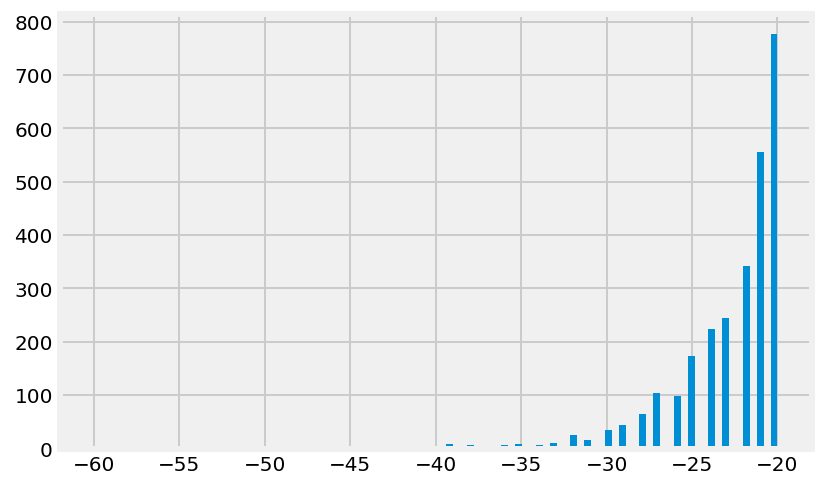

In [51]:
#Plotting a histogram 
plt.hist(delays_Q4[delays_Q4['dep_delay']< -10]['dep_delay'],
        bins = np.linspace(-60,-20,100));

Negative departure delay histogram for the flight that departed 20 minutes or more ahead of time let's us clearly see the following trends:
* Number of flights with negative delay parabolically decreases with increase of such a delay's absolute value
* Since the airlines tend to start boarding procedures at least 40 minutes before the scheduled departure, we should probably consider negative delays of more than 40 minutes as outliers suspects

In [52]:
#Close look at the flights that departed more than 40 minutes ahead of schedule
delays_Q4[delays_Q4['dep_delay']< -40]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier
253812,10,11,4,2018-10-11,OO,5471,ORD,"Chicago, IL",IL,Illinois,SCE,"State College, PA",PA,Pennsylvania,-42.0,-30.0,528.0,0.0,0.0,0.0,0.0,0.0,Delta Connection
267584,10,26,5,2018-10-26,OO,7408,PLN,"Pellston, MI",MI,Michigan,APN,"Alpena, MI",MI,Michigan,-41.0,-31.0,69.0,0.0,0.0,0.0,0.0,0.0,Delta Connection
663608,11,3,6,2018-11-03,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-44.0,-31.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines
664862,11,5,1,2018-11-05,AS,61,YAK,"Yakutat, AK",AK,Alaska,CDV,"Cordova, AK",AK,Alaska,-43.0,-26.0,213.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines
665563,11,6,2,2018-11-06,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-42.0,-41.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines
672441,11,27,2,2018-11-27,AS,61,YAK,"Yakutat, AK",AK,Alaska,CDV,"Cordova, AK",AK,Alaska,-49.0,-42.0,213.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines
672460,11,27,2,2018-11-27,AS,66,YAK,"Yakutat, AK",AK,Alaska,JNU,"Juneau, AK",AK,Alaska,-49.0,-50.0,198.0,0.0,0.0,0.0,0.0,0.0,Alaska Airlines
985180,11,13,2,2018-11-13,UA,105,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,-47.0,-52.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines
985181,11,13,2,2018-11-13,UA,104,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,-92.0,-87.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines
990525,11,6,2,2018-11-06,UA,105,SPN,"Saipan, TT",TT,U.S. Pacific Trust Territories and Possessions,GUM,"Guam, TT",TT,U.S. Pacific Trust Territories and Possessions,-122.0,-120.0,129.0,0.0,0.0,0.0,0.0,0.0,United Airlines


In [53]:
print(f" {delays_Q4[delays_Q4['dep_delay']< -40].shape[0]} flight departed more than 40 minutes ahead of scheduled time in Q4 2018")

 21 flight departed more than 40 minutes ahead of scheduled time in Q4 2018


A number of flights departing ahead of schedule is very small, and these flights are "true outliers" as they are:
* predominantly operating outside the continetal US - small cities in Alaska or connecting Pacific islands, where these flight are often not regular passenger flights but rather flights with different purposes (mail/cargo/military/work shifts, etc)
* the flights within the contigious states have at least one very small airport as their origin and/or destination that points us at the plain being probably very small and not having any passengers on a particular flight and/or having just a few, hence the boarding procedures would still begin on time, but elapse very little time
* major airline flights between major airports are most probably technical flights without passengers

Taking into account the above-mentioned aspects we could drop these flights as "true outliers".

In [54]:
#Dropping true outliers
delays_Q4 = delays_Q4[delays_Q4['dep_delay']> -40]

If we analyze the situations when the flights arrive with a negative delay on arrival, we should also account for the US carriers "padding" their flight schedules in order to minimize the delays. This practice is against the law in the EU, but widely used in the US. Such negative delays often happen for a number of reasons:
* Airlines add 30-40 minutes to a scheduled flight duration anticipating a delay
* The flight gets a favorable flight path which can save additional time agains planned
* (For longer flights) The tail wind is blowing stronger than anticipated increasing the plane's speed against the ground - for the eastbound flights specifically

Hence, a negative arrival delay of up to 1 hour is probably within the scope of explainable reasons and happens often enough. 

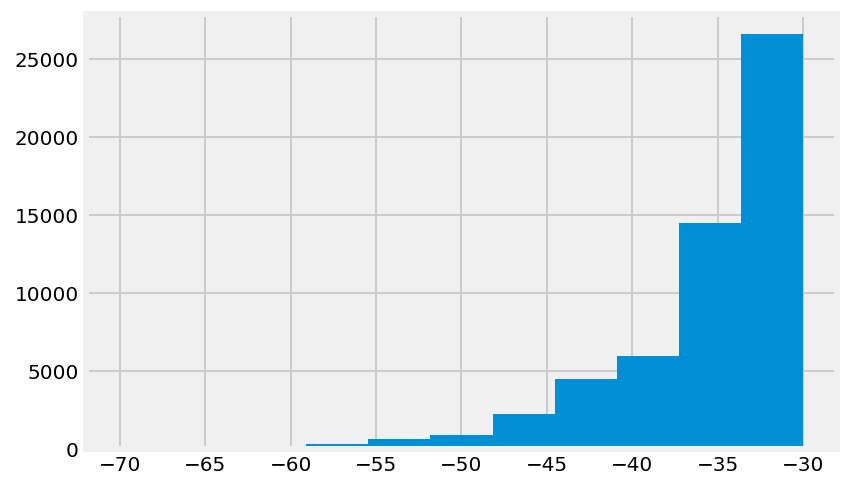

In [55]:
#Plotting a histogram of  negative ARR_DELAY values with the flights arrived 30 minutes or more ahead of schedule
plt.hist(delays_Q4[delays_Q4['arr_delay']<= -30]['arr_delay'],
        bins = np.linspace(-70,-30,12));

In [56]:
print(f" In Q4 2018 a total of {delays_Q4[delays_Q4['arr_delay']<=-75].shape[0]} flight arrived with an arrival delay of 75 or more minutes")

 In Q4 2018 a total of 23 flight arrived with an arrival delay of 75 or more minutes


In [57]:
#Let's have a closer look at these flights
delays_Q4[delays_Q4['arr_delay']<=-75].describe()

,month,day_of_month,day_of_week,op_carrier_fl_num,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.0,23.0
mean,11.608696,16.000000,3.086957,2136.521739,-9.608696,-84.652174,2176.782609,0.0,0.0,0.0,0.0,0.0
std,0.656376,9.477245,2.353200,1777.680764,5.702783,10.696680,909.545389,0.0,0.0,0.0,0.0,0.0
min,10.000000,1.000000,1.000000,267.000000,-20.000000,-117.000000,1005.000000,0.0,0.0,0.0,0.0,0.0
25%,11.000000,10.500000,1.000000,854.000000,-12.500000,-84.500000,1362.500000,0.0,0.0,0.0,0.0,0.0
50%,12.000000,13.000000,2.000000,1409.000000,-8.000000,-81.000000,2378.000000,0.0,0.0,0.0,0.0,0.0
75%,12.000000,22.000000,5.500000,3339.000000,-5.500000,-78.500000,2464.500000,0.0,0.0,0.0,0.0,0.0
max,12.000000,31.000000,7.000000,6996.000000,0.000000,-76.000000,4962.000000,0.0,0.0,0.0,0.0,0.0


In [58]:
print(f" These flights accounted for about \
{round(delays_Q4[delays_Q4['arr_delay']<=-75].shape[0]/delays_Q4.shape[0]*100,4)}% of all flights")

 These flights accounted for about 0.0013% of all flights


As we could see, these "true arrival outliers" flights are quiet negligible and can be dropped for the sake of consistency.

In [59]:
#Dropping "true arrival outliers"
delays_Q4 = delays_Q4[delays_Q4['arr_delay']>-75]

Now let's estimate a number of flights having 15 or more minutes of arrival delay. In the airline world this is considered to be a flight arrival delay and will be the main focus of further research. 

In [60]:
print(f" In Q4 2018 {delays_Q4[delays_Q4['arr_delay']>14].shape[0]} flights had an arrival delay of 15 or more minutes")

 In Q4 2018 325278 flights had an arrival delay of 15 or more minutes


In [61]:
print(f"It is about {round(delays_Q4[delays_Q4['arr_delay']>14].shape[0]/delays_Q4.shape[0]*100,2)}% of total domestic flights arriving at their destination") 

It is about 18.3% of total domestic flights arriving at their destination


In [62]:
#Information on our flight data
delays_Q4.describe().T

,count,mean,std,min,25%,50%,75%,max
month,1777932.0,10.986120,0.820834,10.0,10.0,11.0,12.0,12.0
day_of_month,1777932.0,15.803844,8.819842,1.0,8.0,16.0,23.0,31.0
day_of_week,1777932.0,3.929153,2.008320,1.0,2.0,4.0,6.0,7.0
op_carrier_fl_num,1777932.0,2612.546445,1842.995689,1.0,1066.0,2180.0,4014.0,7909.0
dep_delay,1777932.0,8.422437,42.602019,-39.0,-6.0,-2.0,5.0,2109.0
arr_delay,1777932.0,4.276324,47.415079,-74.0,-14.0,-6.0,7.0,2153.0
distance,1777932.0,797.385702,594.175118,31.0,363.0,632.0,1028.0,4983.0
carrier_delay,1777932.0,0.046780,0.211168,0.0,0.0,0.0,0.0,1.0
weather_delay,1777932.0,0.004473,0.066728,0.0,0.0,0.0,0.0,1.0
nas_delay,1777932.0,0.057637,0.233056,0.0,0.0,0.0,0.0,1.0


In [63]:
#A flight with the biggest delay
delays_Q4[delays_Q4['arr_delay'] == 2153]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier
339693,10,21,7,2018-10-21,AA,1679,BDL,"Hartford, CT",CT,Connecticut,PHL,"Philadelphia, PA",PA,Pennsylvania,2109.0,2153.0,196.0,1.0,0.0,0.0,0.0,0.0,American Airlines


In [64]:
#Flights with delay of more than 24h (1440 minutes)
delays_Q4[delays_Q4['arr_delay'] > 1440]

,month,day_of_month,day_of_week,fl_date,op_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_abr,origin_state_nm,dest,dest_city_name,dest_state_abr,dest_state_nm,dep_delay,arr_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier
196344,10,9,2,2018-10-09,AA,2527,BOS,"Boston, MA",MA,Massachusetts,DFW,"Dallas/Fort Worth, TX",TX,Texas,-7.0,1458.0,1562.0,0.0,0.0,0.0,0.0,0.0,American Airlines
232057,10,23,2,2018-10-23,YV,5796,OAK,"Oakland, CA",CA,California,PHX,"Phoenix, AZ",AZ,Arizona,1723.0,1773.0,646.0,1.0,0.0,0.0,0.0,0.0,MESA
274415,10,13,6,2018-10-13,AA,1478,RDU,"Raleigh/Durham, NC",NC,North Carolina,DFW,"Dallas/Fort Worth, TX",TX,Texas,1822.0,1866.0,1061.0,1.0,0.0,0.0,0.0,0.0,American Airlines
287638,10,20,6,2018-10-20,AA,2583,BNA,"Nashville, TN",TN,Tennessee,DFW,"Dallas/Fort Worth, TX",TX,Texas,1555.0,1537.0,631.0,1.0,0.0,0.0,0.0,0.0,American Airlines
339693,10,21,7,2018-10-21,AA,1679,BDL,"Hartford, CT",CT,Connecticut,PHL,"Philadelphia, PA",PA,Pennsylvania,2109.0,2153.0,196.0,1.0,0.0,0.0,0.0,0.0,American Airlines
420639,10,9,2,2018-10-09,EV,4308,CLE,"Cleveland, OH",OH,Ohio,LGA,"New York, NY",NY,New York,1422.0,1443.0,419.0,0.0,0.0,1.0,0.0,0.0,United Express
498686,10,29,1,2018-10-29,YV,5729,SBA,"Santa Barbara, CA",CA,California,PHX,"Phoenix, AZ",AZ,Arizona,1558.0,1576.0,455.0,1.0,0.0,0.0,0.0,0.0,MESA
499292,10,22,1,2018-10-22,YV,5744,IAH,"Houston, TX",TX,Texas,PHX,"Phoenix, AZ",AZ,Arizona,1487.0,1478.0,1009.0,1.0,0.0,0.0,0.0,0.0,MESA
561070,10,2,2,2018-10-02,AA,1189,TPA,"Tampa, FL",FL,Florida,DFW,"Dallas/Fort Worth, TX",TX,Texas,1460.0,1477.0,929.0,0.0,0.0,0.0,0.0,1.0,American Airlines
630206,11,25,7,2018-11-25,AA,2787,BNA,"Nashville, TN",TN,Tennessee,DFW,"Dallas/Fort Worth, TX",TX,Texas,1573.0,1585.0,631.0,1.0,0.0,0.0,0.0,0.0,American Airlines


In [65]:
#Saving our cleaned data into a csv file
delays_Q4.to_csv('~/ga/projects/capstone_data/data/delaysQ4_2018_cleaned.csv')